In [1]:
import os
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm, trange

os.getcwd()

'/home/yannikkellerde/github_repos/algorithmic-institutions/notebooks/test_manager'

In [2]:
%matplotlib inline

In [3]:
fig_path = "../../plots/05_all"
os.makedirs(fig_path, exist_ok=True)

In [12]:
def load_data(data_folders, evals_path="evals"):
    def clean_run_name(run_name):
        return run_name.replace("ah full managed by ", "")

    already_runs = []
    dfs = []
    for data_folder in data_folders:
        df = pd.read_csv(os.path.join(evals_path, data_folder, "data.csv"))
        if len(already_runs) > 0:
            df = df[~df["run"].isin(already_runs)]
        already_runs.extend(df["run"].unique())

        dfs.append(df)

    df = pd.concat(dfs)
    df = df[~df["run"].str.contains("ah human")]
    df = df[~df["run"].str.contains("pilot")]
    # df = df[~df["run"].str.contains("humanlike")]

    df["payoff"] = 20 - df["contribution"] - df["punishment"] + df["common_good"]

    df["run"] = df["run"].apply(clean_run_name)
    return df


# df = load_data(
#    ["05_all", "10_few", "11_one", "09_some", "12_heavies"], evals_path="../../evals"
# )
df = load_data(["pgh_humanlike_500"], evals_path="../../artifacts/evals")

/tmp/ipykernel_165056/60237627.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(evals_path, data_folder, "data.csv"))


In [13]:
df["run"].unique()
# df = df[df["run"].isin(["group_payoff_heavy", "gamma_07"])]
abbreviation_map = {
    "gamma_07": "ci, γ=0.7",
    "gamma_09": "ci, γ=0.9",
    "gamma_08": "ci, γ=0.8",
    "gamma_05": "ci, γ=0.5",
    "group_payoff": "pg, γ=0.98",
    "group_payoff_heavy": "pgh, γ=0.98",
    "payoff_impact": "pi, γ=0.98",
    "gamma_1": "ci, γ=1",
    "gamma_0": "ci, γ=0",
    "true_common_good_gamma_08": "cg, γ=0.8",
    "gamma_07_heavy": "cih, γ=0.7",
    "gamma_08_heavy": "cih, γ=0.8",
    "true_common_good_heavy": "cgh, γ=0.8",
    "group_payoff_heavy_gamma_08": "pgh, γ=0.8",
}
df["run"] = df["run"].apply(lambda x: abbreviation_map.get(x, x))

In [14]:
df = df[~df["run"].str.contains("ah human")]

In [15]:
df["run"].unique()

array(['humanlike', 'pgh, λ=0.98'], dtype=object)

In [16]:
df["payoff"] = 20 - df["contribution"] - df["punishment"] + df["common_good"]

In [17]:
df["common_good"].max()

32.0

In [18]:
def clean_run_name(run_name):
    return run_name.replace("ah full managed by ", "").replace(
        "ah human managed managed by ", ""
    )


df["run"] = df["run"].apply(clean_run_name)
# df = df[~df["run"].isin(["gamma_05", "humanlike"])]
df = df.drop(columns=["group", "global_group_id"])

dfm = df.melt(
    id_vars=["episode", "round_number", "participant_code", "run"],
    value_vars=["punishment", "contribution", "common_good", "payoff"],
)

(array([0]), [Text(0, 0, 'pgh, λ=0.98')])

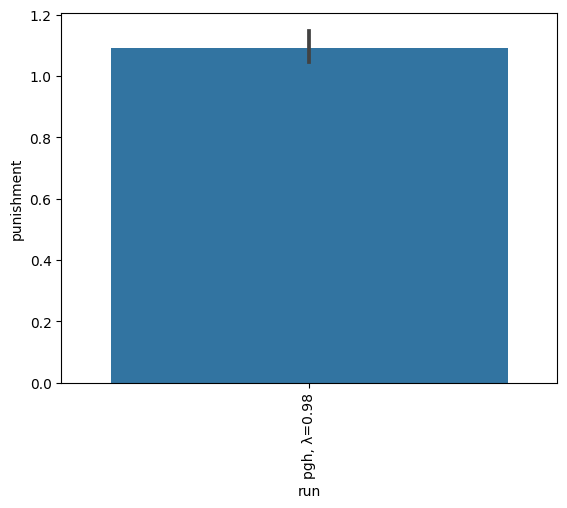

In [19]:
df20 = df[(df["contribution"] == 20) & (df["round_number"] < 2)]
sns.barplot(data=df20, x="run", y="punishment")
plt.xticks(rotation=90)

In [57]:
df20.groupby("run")["punishment"].mean()

run
cg, γ=0.8      1.109346
cgh, γ=0.8     1.064929
ci, γ=0        1.056243
ci, γ=0.5      0.873596
ci, γ=0.7      0.686974
ci, γ=0.8      0.714428
ci, γ=0.9      0.690408
ci, γ=1        1.007645
cih, γ=0.7     0.674521
cih, γ=0.8     0.675132
pg, γ=0.98     1.306192
pgh, γ=0.8     0.000000
pgh, γ=0.98    1.101808
pi, γ=0.98     0.608025
Name: punishment, dtype: float64

In [58]:
df.groupby(["run", "round_number", "episode"])[
    "punishment"
].std().reset_index().groupby("run").mean().reset_index()

/tmp/ipykernel_99378/1676130279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["run", "round_number", "episode"])[


,run,round_number,punishment
0,"cg, γ=0.8",11.5,2.444286
1,"cgh, γ=0.8",11.5,2.054495
2,"ci, γ=0",11.5,0.103508
3,"ci, γ=0.5",11.5,0.524699
4,"ci, γ=0.7",11.5,1.407955
5,"ci, γ=0.8",11.5,1.948629
6,"ci, γ=0.9",11.5,2.597932
7,"ci, γ=1",11.5,2.924051
8,"cih, γ=0.7",11.5,1.493290
9,"cih, γ=0.8",11.5,1.850056


In [59]:
df[df["run"] == "pgh, γ=0.98"][df["round_number"] == 2]["contribution"].mean()

/tmp/ipykernel_99378/2411766985.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["run"] == "pgh, γ=0.98"][df["round_number"] == 2]["contribution"].mean()


15.107

In [60]:
df

,episode,participant_code,round_number,punishment,common_good,contribution,run,payoff
288000,ah full managed by gamma_1__0,0_0,0,1.0,18.600000,20.0,"ci, γ=1",17.600000
288001,ah full managed by gamma_1__0,0_0,1,13.0,-0.700000,10.0,"ci, γ=1",-3.700000
288002,ah full managed by gamma_1__0,0_0,2,21.0,5.450001,4.0,"ci, γ=1",0.450001
288003,ah full managed by gamma_1__0,0_0,3,27.0,-2.750000,3.0,"ci, γ=1",-12.750000
288004,ah full managed by gamma_1__0,0_0,4,27.0,13.750000,5.0,"ci, γ=1",1.750000
...,...,...,...,...,...,...,...,...
479995,ah full managed by group_payoff_heavy_gamma_08...,3_999,19,0.0,17.200001,12.0,"pgh, γ=0.8",25.200001
479996,ah full managed by group_payoff_heavy_gamma_08...,3_999,20,0.0,17.600000,6.0,"pgh, γ=0.8",31.600000
479997,ah full managed by group_payoff_heavy_gamma_08...,3_999,21,0.0,12.800000,8.0,"pgh, γ=0.8",24.800000
479998,ah full managed by group_payoff_heavy_gamma_08...,3_999,22,0.0,10.400001,4.0,"pgh, γ=0.8",26.400001


In [61]:
df = df.sort_values(["run", "episode", "participant_code", "round_number"])
df["contrib_diff"] = df["contribution"].diff()
df.loc[df["round_number"] == 0, "contrib_diff"] = 0

In [62]:
dfst = (
    df[["run", "episode", "contribution", "round_number", "punishment"]]
    .groupby(["run", "episode", "contribution", "round_number"])
    .agg(["std", "count"])
    .reset_index()
)

In [63]:
dfst.columns = dfst.columns.to_flat_index().str.join("")
dfst = dfst.rename(
    columns={"punishmentstd": "punishment_std", "punishmentcount": "punishment_count"}
)
dfst = dfst[dfst["punishment_count"] > 1]

In [64]:
dfst.punishment_std.mean()

0.17697040777126702

In [65]:
# dfr = df[df["run"].isin(["gamma_1","gamma_09","gamma_08","gamma_05","gamma_0"])]
dfr = df.copy()

In [66]:
df_eq = df.copy()
df_eq = (
    df[["run", "episode", "contribution", "round_number", "punishment"]]
    .groupby(["run", "episode", "round_number"])["punishment"]
    .apply(lambda x: all(y == x.iloc[0] for y in x.iloc))
)

In [67]:
dfr["contrib_rank"] = (
    dfr[["run", "episode", "contribution", "round_number", "punishment"]]
    .groupby(["run", "episode", "round_number"])["contribution"]
    .rank(method="dense", ascending=False)
)
dfr["punish_with_tiebreaker"] = dfr["punishment"] + dfr["contrib_rank"] * 0.01

dfr["punish_rank"] = (
    dfr[["run", "episode", "contribution", "round_number", "punish_with_tiebreaker"]]
    .groupby(["run", "episode", "round_number"])["punish_with_tiebreaker"]
    .rank(method="dense")
)

In [68]:
stuff = (
    dfr[["run", "episode", "contribution", "round_number", "punishment"]]
    .groupby(["run", "episode", "round_number"])["punishment"]
    .sum()
    .reset_index()
)

dfr = dfr.merge(stuff, on=["run", "episode", "round_number"], suffixes=("", "_sum"))

In [69]:
dfr

,episode,participant_code,round_number,punishment,common_good,contribution,run,payoff,contrib_diff,contrib_rank,punish_with_tiebreaker,punish_rank,punishment_sum
0,ah full managed by true_common_good_gamma_08__0,0_0,0,19.0,-4.0,4.0,"cg, γ=0.8",-7.0,0.0,4.0,19.04,4.0,46.0
1,ah full managed by true_common_good_gamma_08__0,1_0,0,19.0,-4.0,7.0,"cg, γ=0.8",-10.0,0.0,3.0,19.03,3.0,46.0
2,ah full managed by true_common_good_gamma_08__0,2_0,0,6.0,-4.0,9.0,"cg, γ=0.8",1.0,0.0,2.0,6.02,2.0,46.0
3,ah full managed by true_common_good_gamma_08__0,3_0,0,2.0,-4.0,15.0,"cg, γ=0.8",-1.0,0.0,1.0,2.01,1.0,46.0
4,ah full managed by true_common_good_gamma_08__0,0_0,1,3.0,5.0,11.0,"cg, γ=0.8",11.0,7.0,2.0,3.02,2.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343995,ah full managed by payoff_impact__999,3_999,22,0.0,7.2,8.0,"pi, γ=0.98",19.2,5.0,1.0,0.01,1.0,0.0
1343996,ah full managed by payoff_impact__999,0_999,23,0.0,8.8,1.0,"pi, γ=0.98",27.8,-5.0,4.0,0.04,4.0,0.0
1343997,ah full managed by payoff_impact__999,1_999,23,0.0,8.8,6.0,"pi, γ=0.98",22.8,4.0,2.0,0.02,2.0,0.0
1343998,ah full managed by payoff_impact__999,2_999,23,0.0,8.8,5.0,"pi, γ=0.98",23.8,3.0,3.0,0.03,3.0,0.0


In [70]:
dfr = dfr[dfr["punishment_sum"] > 0]

In [71]:
# Round level fairness measure
(dfr["punish_rank"] == dfr["contrib_rank"]).mean()

0.736947797857519

In [72]:
dfr

,episode,participant_code,round_number,punishment,common_good,contribution,run,payoff,contrib_diff,contrib_rank,punish_with_tiebreaker,punish_rank,punishment_sum
0,ah full managed by true_common_good_gamma_08__0,0_0,0,19.0,-4.00,4.0,"cg, γ=0.8",-7.00,0.0,4.0,19.04,4.0,46.0
1,ah full managed by true_common_good_gamma_08__0,1_0,0,19.0,-4.00,7.0,"cg, γ=0.8",-10.00,0.0,3.0,19.03,3.0,46.0
2,ah full managed by true_common_good_gamma_08__0,2_0,0,6.0,-4.00,9.0,"cg, γ=0.8",1.00,0.0,2.0,6.02,2.0,46.0
3,ah full managed by true_common_good_gamma_08__0,3_0,0,2.0,-4.00,15.0,"cg, γ=0.8",-1.00,0.0,1.0,2.01,1.0,46.0
4,ah full managed by true_common_good_gamma_08__0,0_0,1,3.0,5.00,11.0,"cg, γ=0.8",11.00,7.0,2.0,3.02,2.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343919,ah full managed by payoff_impact__999,3_999,3,0.0,10.95,7.0,"pi, γ=0.98",23.95,-12.0,3.0,0.03,2.0,1.0
1343920,ah full managed by payoff_impact__999,0_999,4,0.0,8.95,5.0,"pi, γ=0.98",23.95,-7.0,2.0,0.02,1.0,1.0
1343921,ah full managed by payoff_impact__999,1_999,4,1.0,8.95,14.0,"pi, γ=0.98",13.95,6.0,1.0,1.01,4.0,1.0
1343922,ah full managed by payoff_impact__999,2_999,4,0.0,8.95,0.0,"pi, γ=0.98",28.95,-1.0,4.0,0.04,3.0,1.0


In [75]:
df

,episode,participant_code,round_number,punishment,common_good,contribution,run,payoff,contrib_diff
288000,ah full managed by true_common_good_gamma_08__0,0_0,0,19.0,-4.000000,4.0,"cg, γ=0.8",-7.000000,0.0
288001,ah full managed by true_common_good_gamma_08__0,0_0,1,3.0,5.000000,11.0,"cg, γ=0.8",11.000000,7.0
288002,ah full managed by true_common_good_gamma_08__0,0_0,2,3.0,-0.700000,10.0,"cg, γ=0.8",6.300000,-1.0
288003,ah full managed by true_common_good_gamma_08__0,0_0,3,16.0,7.650000,7.0,"cg, γ=0.8",4.650000,-3.0
288004,ah full managed by true_common_good_gamma_08__0,0_0,4,2.0,9.550001,10.0,"cg, γ=0.8",17.550001,3.0
...,...,...,...,...,...,...,...,...,...
191995,ah full managed by payoff_impact__999,3_999,19,0.0,3.600000,8.0,"pi, γ=0.98",15.600000,-2.0
191996,ah full managed by payoff_impact__999,3_999,20,0.0,8.000000,8.0,"pi, γ=0.98",20.000000,0.0
191997,ah full managed by payoff_impact__999,3_999,21,0.0,2.000000,3.0,"pi, γ=0.98",19.000000,-5.0
191998,ah full managed by payoff_impact__999,3_999,22,0.0,7.200000,8.0,"pi, γ=0.98",19.200000,5.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'cg, γ=0.8'),
  Text(1, 0, 'cgh, γ=0.8'),
  Text(2, 0, 'ci, γ=0'),
  Text(3, 0, 'ci, γ=0.5'),
  Text(4, 0, 'ci, γ=0.7'),
  Text(5, 0, 'ci, γ=0.8'),
  Text(6, 0, 'ci, γ=0.9'),
  Text(7, 0, 'ci, γ=1'),
  Text(8, 0, 'cih, γ=0.7'),
  Text(9, 0, 'cih, γ=0.8'),
  Text(10, 0, 'pg, γ=0.98'),
  Text(11, 0, 'pgh, γ=0.8'),
  Text(12, 0, 'pgh, γ=0.98'),
  Text(13, 0, 'pi, γ=0.98')])

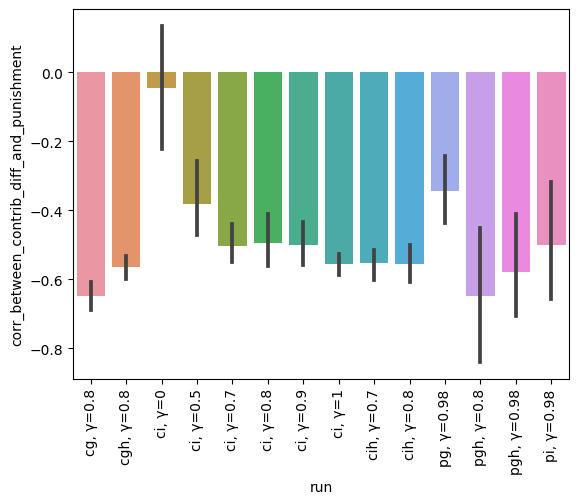

In [107]:
dfc = (
    dfr.groupby(["run", "round_number"])[["contrib_diff", "punishment"]]
    .corr("pearson")
    .reset_index()
)
dfc = dfc[dfc["level_2"] == "contrib_diff"][["run", "punishment"]].rename(
    columns={"punishment": "corr_between_contrib_diff_and_punishment"}
)
sns.barplot(data=dfc, x="run", y="corr_between_contrib_diff_and_punishment")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'cg, γ=0.8'),
  Text(1, 0, 'cgh, γ=0.8'),
  Text(2, 0, 'ci, γ=0'),
  Text(3, 0, 'ci, γ=0.5'),
  Text(4, 0, 'ci, γ=0.7'),
  Text(5, 0, 'ci, γ=0.8'),
  Text(6, 0, 'ci, γ=0.9'),
  Text(7, 0, 'ci, γ=1'),
  Text(8, 0, 'cih, γ=0.7'),
  Text(9, 0, 'cih, γ=0.8'),
  Text(10, 0, 'pg, γ=0.98'),
  Text(11, 0, 'pgh, γ=0.8'),
  Text(12, 0, 'pgh, γ=0.98'),
  Text(13, 0, 'pi, γ=0.98')])

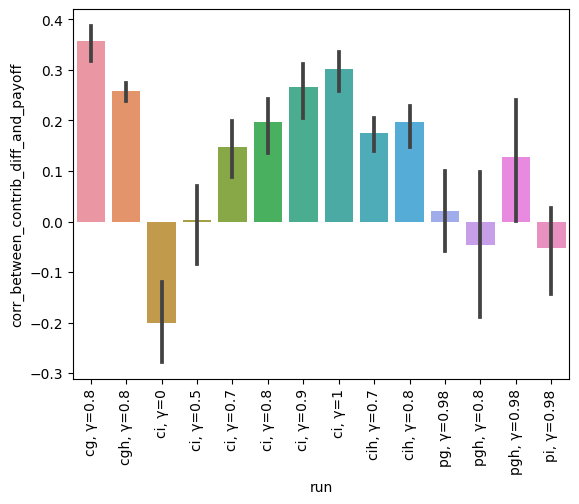

In [105]:
dfc = (
    dfr.groupby(["run", "round_number"])[["contrib_diff", "payoff"]]
    .corr("pearson")
    .reset_index()
)
dfc = dfc[dfc["level_2"] == "contrib_diff"][["run", "payoff"]].rename(
    columns={"payoff": "corr_between_contrib_diff_and_payoff"}
)
sns.barplot(data=dfc, x="run", y="corr_between_contrib_diff_and_payoff")
plt.xticks(rotation=90)

In [98]:
(
    dfr.groupby(["run", "round_number"])[["contribution", "punishment"]]
    .corr("pearson")
    .reset_index()
)

,run,round_number,level_2,contribution,punishment
0,"cg, γ=0.8",0,contribution,1.000000,-0.880672
1,"cg, γ=0.8",0,punishment,-0.880672,1.000000
2,"cg, γ=0.8",1,contribution,1.000000,-0.873789
3,"cg, γ=0.8",1,punishment,-0.873789,1.000000
4,"cg, γ=0.8",2,contribution,1.000000,-0.860262
...,...,...,...,...,...
653,"pi, γ=0.98",21,punishment,0.874803,1.000000
654,"pi, γ=0.98",22,contribution,1.000000,0.325297
655,"pi, γ=0.98",22,punishment,0.325297,1.000000
656,"pi, γ=0.98",23,contribution,1.000000,0.210277


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'cg, γ=0.8'),
  Text(1, 0, 'cgh, γ=0.8'),
  Text(2, 0, 'ci, γ=0'),
  Text(3, 0, 'ci, γ=0.5'),
  Text(4, 0, 'ci, γ=0.7'),
  Text(5, 0, 'ci, γ=0.8'),
  Text(6, 0, 'ci, γ=0.9'),
  Text(7, 0, 'ci, γ=1'),
  Text(8, 0, 'cih, γ=0.7'),
  Text(9, 0, 'cih, γ=0.8'),
  Text(10, 0, 'pg, γ=0.98'),
  Text(11, 0, 'pgh, γ=0.8'),
  Text(12, 0, 'pgh, γ=0.98'),
  Text(13, 0, 'pi, γ=0.98')])

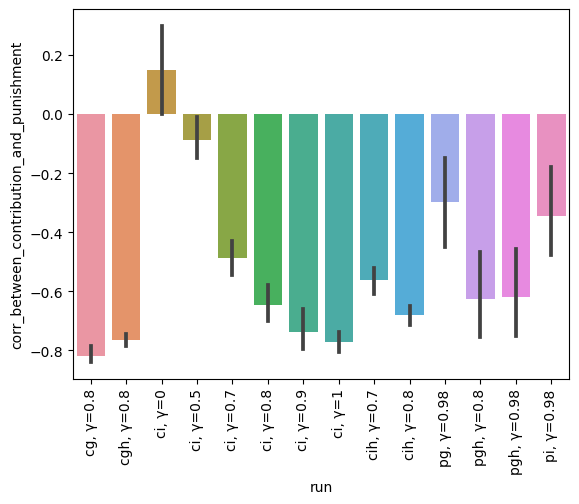

In [106]:
dfc = (
    dfr.groupby(["run", "round_number"])[["contribution", "punishment"]]
    .corr("pearson")
    .reset_index()
)
dfc = dfc[dfc["level_2"] == "contribution"][["run", "punishment"]].rename(
    columns={"punishment": "corr_between_contribution_and_punishment"}
)
sns.barplot(data=dfc, x="run", y="corr_between_contribution_and_punishment")
plt.xticks(rotation=90)

In [84]:
dfr["is_fair"] = dfr["punish_rank"] == dfr["contrib_rank"]
fair_compute = (
    dfr[dfr["round_number"] < 3].groupby("run")["is_fair"].mean().reset_index()
)
fair_compute

/tmp/ipykernel_4136/2730154114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr["is_fair"] = dfr["punish_rank"] == dfr["contrib_rank"]


,run,is_fair
0,"cg, γ=0.8",0.848443
1,"cgh, γ=0.8",0.853365
2,"ci, γ=0",0.199969
3,"ci, γ=0.5",0.257149
4,"ci, γ=0.7",0.746827
5,"ci, γ=0.8",0.832441
6,"ci, γ=0.9",0.800619
7,"ci, γ=1",0.795226
8,"cih, γ=0.7",0.736168
9,"cih, γ=0.8",0.797411


In [ ]:
# Round level fairness measure
choose_runs = ["ci, γ=0.7"]

fair_ci = (
    dfr[dfr["run"].isin(choose_runs)]["punish_rank"]
    == dfr[dfr["run"].isin(choose_runs)]["contrib_rank"]
).mean()
fair_ci

0.6432103125551828

In [ ]:
# Round level fairness measure
choose_runs = ["pgh, γ=0.98"]

fair_group_heavy = (
    dfr[dfr["run"].isin(choose_runs)]["punish_rank"]
    == dfr[dfr["run"].isin(choose_runs)]["contrib_rank"]
).mean()
fair_group_heavy

0.8068768436578171

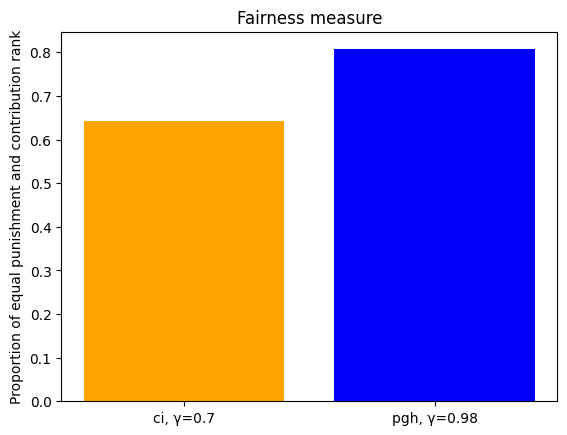

In [ ]:
plt.bar((0, 1), (fair_ci, fair_group_heavy), color=["orange", "blue"])
plt.xticks((0, 1), ["ci, γ=0.7", "pgh, γ=0.98"])
plt.title("Fairness measure")
plt.ylabel("Proportion of equal punishment and contribution rank")
plt.savefig(os.path.join(fig_path, "fairness_measure.png"))

In [ ]:
dfr[dfr["round_number"] == 1]

,episode,participant_code,round_number,punishment,common_good,contribution,group,run,global_group_id,payoff,contrib_rank,punish_with_tiebreaker,punish_rank,punishment_sum
4,ah full managed by group_payoff_heavy__0,0_0,1,1.0,29.400000,20.0,0.0,"pgh, γ=0.98",NaN,28.400000,1.0,1.01,1.0,4.0
5,ah full managed by group_payoff_heavy__0,1_0,1,1.0,29.400000,16.0,0.0,"pgh, γ=0.98",NaN,32.400000,2.0,1.02,2.0,4.0
6,ah full managed by group_payoff_heavy__0,2_0,1,1.0,29.400000,20.0,0.0,"pgh, γ=0.98",NaN,28.400000,1.0,1.01,1.0,4.0
7,ah full managed by group_payoff_heavy__0,3_0,1,1.0,29.400000,20.0,0.0,"pgh, γ=0.98",NaN,28.400000,1.0,1.01,1.0,4.0
100,ah full managed by group_payoff_heavy__1,0_1,1,0.0,27.000000,20.0,0.0,"pgh, γ=0.98",NaN,27.000000,1.0,0.01,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191815,ah full managed by gamma_07__998,3_998,1,0.0,24.750000,15.0,0.0,"ci, γ=0.7",NaN,29.750000,2.0,0.02,2.0,5.0
191908,ah full managed by gamma_07__999,0_999,1,4.0,15.550001,12.0,0.0,"ci, γ=0.7",NaN,19.550001,2.0,4.02,4.0,5.0
191909,ah full managed by gamma_07__999,1_999,1,0.0,15.550001,9.0,0.0,"ci, γ=0.7",NaN,26.550001,3.0,0.03,1.0,5.0
191910,ah full managed by gamma_07__999,2_999,1,1.0,15.550001,15.0,0.0,"ci, γ=0.7",NaN,19.550001,1.0,1.01,3.0,5.0


In [ ]:
dfm

,episode,round_number,participant_code,run,variable,value
0,ah full managed by group_payoff_heavy__0,0,0_0,"pgh, γ=0.98",punishment,15.0
1,ah full managed by group_payoff_heavy__0,1,0_0,"pgh, γ=0.98",punishment,1.0
2,ah full managed by group_payoff_heavy__0,2,0_0,"pgh, γ=0.98",punishment,0.0
3,ah full managed by group_payoff_heavy__0,3,0_0,"pgh, γ=0.98",punishment,0.0
4,ah full managed by group_payoff_heavy__0,4,0_0,"pgh, γ=0.98",punishment,0.0
...,...,...,...,...,...,...
767995,ah full managed by gamma_07__999,19,3_999,"ci, γ=0.7",payoff,20.3
767996,ah full managed by gamma_07__999,20,3_999,"ci, γ=0.7",payoff,28.8
767997,ah full managed by gamma_07__999,21,3_999,"ci, γ=0.7",payoff,23.4
767998,ah full managed by gamma_07__999,22,3_999,"ci, γ=0.7",payoff,23.0


In [ ]:
dfe = (
    dfm[
        ~dfm["run"].isin(
            ["pilot human manager", "pilot rule based manager", "humanlike"]
        )
    ][dfm["variable"].isin(("payoff", "contribution", "punishment"))][
        ["episode", "participant_code", "value", "run", "variable"]
    ]
    .groupby(["episode", "participant_code", "run", "variable"])
    .sum()
    .reset_index()
)
dfe

,episode,participant_code,run,variable,value
0,ah full managed by gamma_07__0,0_0,"ci, γ=0.7",contribution,142.000000
1,ah full managed by gamma_07__0,0_0,"ci, γ=0.7",payoff,540.633339
2,ah full managed by gamma_07__0,0_0,"ci, γ=0.7",punishment,14.000000
3,ah full managed by gamma_07__0,1_0,"ci, γ=0.7",contribution,181.000000
4,ah full managed by gamma_07__0,1_0,"ci, γ=0.7",payoff,502.633339
...,...,...,...,...,...
23995,ah full managed by group_payoff_heavy__999,2_999,"pgh, γ=0.98",payoff,714.666668
23996,ah full managed by group_payoff_heavy__999,2_999,"pgh, γ=0.98",punishment,24.000000
23997,ah full managed by group_payoff_heavy__999,3_999,"pgh, γ=0.98",contribution,480.000000
23998,ah full managed by group_payoff_heavy__999,3_999,"pgh, γ=0.98",payoff,643.666668


In [ ]:
df_big = (
    dfe[dfe["variable"] == "contribution"]
    .merge(dfe[dfe["variable"] == "payoff"], on=["episode", "participant_code", "run"])
    .merge(
        dfe[dfe["variable"] == "punishment"], on=["episode", "participant_code", "run"]
    )
    .rename(
        columns={"value_x": "contribution", "value_y": "payoff", "value": "punishment"}
    )
    .drop(columns=["variable_x", "variable_y", "variable"])
)

In [ ]:
df_big

,episode,participant_code,run,contribution,payoff,punishment
0,ah full managed by gamma_07__0,0_0,"ci, γ=0.7",142.0,540.633339,14.0
1,ah full managed by gamma_07__0,1_0,"ci, γ=0.7",181.0,502.633339,13.0
2,ah full managed by gamma_07__0,2_0,"ci, γ=0.7",181.0,454.633339,61.0
3,ah full managed by gamma_07__0,3_0,"ci, γ=0.7",140.0,518.633339,38.0
4,ah full managed by gamma_07__1,0_1,"ci, γ=0.7",465.0,552.416672,11.0
...,...,...,...,...,...,...
7995,ah full managed by group_payoff_heavy__998,3_998,"pgh, γ=0.98",245.0,684.200012,70.0
7996,ah full managed by group_payoff_heavy__999,0_999,"pgh, γ=0.98",473.0,650.666668,3.0
7997,ah full managed by group_payoff_heavy__999,1_999,"pgh, γ=0.98",319.0,765.666668,42.0
7998,ah full managed by group_payoff_heavy__999,2_999,"pgh, γ=0.98",388.0,714.666668,24.0


In [ ]:
mean_df = df_big.groupby("episode").mean(numeric_only=True).reset_index()

In [ ]:
dfg = df_big.join(mean_df.set_index("episode"), on="episode", rsuffix="_mean")
dfg["contribution_delta"] = dfg["contribution"] - dfg["contribution_mean"]
dfg["payoff_delta"] = dfg["payoff"] - dfg["payoff_mean"]
dfg["punishment_delta"] = dfg["punishment"] - dfg["punishment_mean"]
dfg

,episode,participant_code,run,contribution,payoff,punishment,contribution_mean,payoff_mean,punishment_mean,contribution_delta,payoff_delta,punishment_delta
0,ah full managed by gamma_07__0,0_0,"ci, γ=0.7",142.0,540.633339,14.0,161.00,504.133339,31.5,-19.00,36.50,-17.5
1,ah full managed by gamma_07__0,1_0,"ci, γ=0.7",181.0,502.633339,13.0,161.00,504.133339,31.5,20.00,-1.50,-18.5
2,ah full managed by gamma_07__0,2_0,"ci, γ=0.7",181.0,454.633339,61.0,161.00,504.133339,31.5,20.00,-49.50,29.5
3,ah full managed by gamma_07__0,3_0,"ci, γ=0.7",140.0,518.633339,38.0,161.00,504.133339,31.5,-21.00,14.50,6.5
4,ah full managed by gamma_07__1,0_1,"ci, γ=0.7",465.0,552.416672,11.0,366.00,630.416672,32.0,99.00,-78.00,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,ah full managed by group_payoff_heavy__998,3_998,"pgh, γ=0.98",245.0,684.200012,70.0,340.75,632.450012,26.0,-95.75,51.75,44.0
7996,ah full managed by group_payoff_heavy__999,0_999,"pgh, γ=0.98",473.0,650.666668,3.0,415.00,693.666668,18.0,58.00,-43.00,-15.0
7997,ah full managed by group_payoff_heavy__999,1_999,"pgh, γ=0.98",319.0,765.666668,42.0,415.00,693.666668,18.0,-96.00,72.00,24.0
7998,ah full managed by group_payoff_heavy__999,2_999,"pgh, γ=0.98",388.0,714.666668,24.0,415.00,693.666668,18.0,-27.00,21.00,6.0


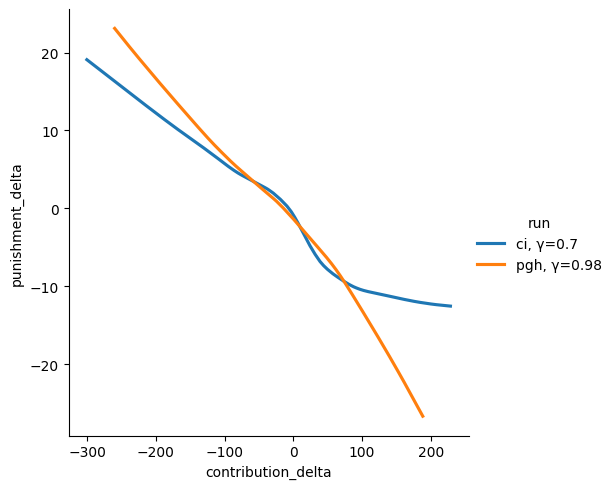

In [ ]:
g = sns.lmplot(
    data=dfg,
    x="contribution_delta",
    y="punishment_delta",
    hue="run",
    scatter=False,
    lowess=True,
)
g.savefig(os.path.join(fig_path, "contrib_punishment_delta_lowess.png"))

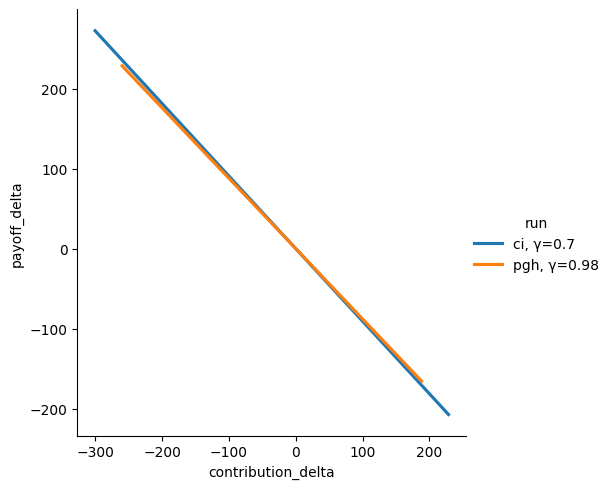

In [ ]:
g = sns.lmplot(
    data=dfg,
    x="contribution_delta",
    y="payoff_delta",
    hue="run",
    scatter=False,
    lowess=False,
)

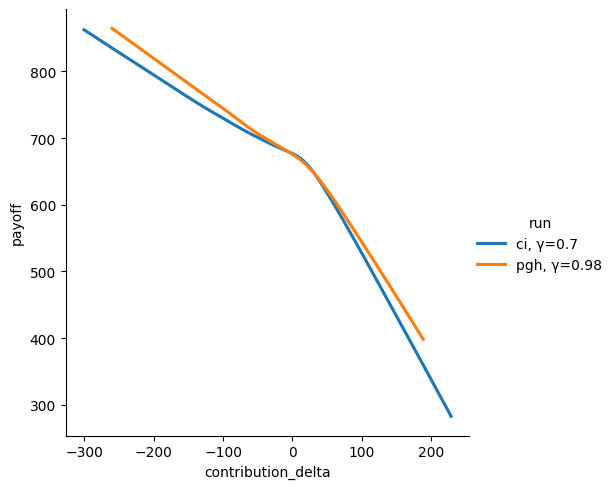

In [ ]:
g = sns.lmplot(
    data=dfg,
    x="contribution_delta",
    y="payoff",
    hue="run",
    scatter=False,
    lowess=True,
)
g.savefig(os.path.join(fig_path, "contrib_delta_payoff_lowess.png"))

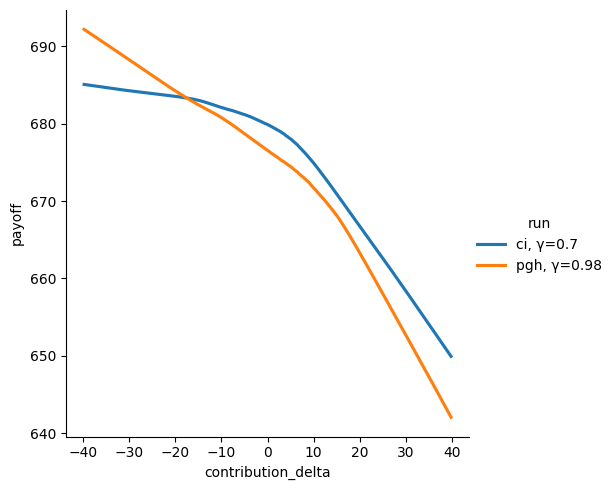

In [ ]:
test_df = dfg[dfg["contribution_delta"] > -40]
test_df = test_df[test_df["contribution_delta"] < 40]
g = sns.lmplot(
    data=test_df,
    x="contribution_delta",
    y="payoff",
    hue="run",
    scatter=False,
    lowess=True,
)
g.savefig(os.path.join(fig_path, "contrib_delta_payoff_40.png"))

In [ ]:
def obtain_dfs(dfm: pd.DataFrame, max_round_number):
    dfm1 = dfm[dfm["round_number"] < max_round_number]
    dfe1 = (
        dfm1[
            ~dfm1["run"].isin(
                ["pilot human manager", "pilot rule based manager", "humanlike"]
            )
        ][dfm1["variable"].isin(("payoff", "contribution", "punishment"))][
            ["episode", "participant_code", "value", "run", "variable"]
        ]
        .groupby(["episode", "participant_code", "run", "variable"])
        .sum()
        .reset_index()
    )
    df_big1 = (
        dfe1[dfe1["variable"] == "contribution"]
        .merge(
            dfe1[dfe1["variable"] == "payoff"],
            on=["episode", "participant_code", "run"],
        )
        .merge(
            dfe1[dfe1["variable"] == "punishment"],
            on=["episode", "participant_code", "run"],
        )
        .rename(
            columns={
                "value_x": "contribution",
                "value_y": "payoff",
                "value": "punishment",
            }
        )
        .drop(columns=["variable_x", "variable_y", "variable"])
    )
    mean_df1 = df_big1.groupby("episode").mean(numeric_only=True).reset_index()
    dfg1 = df_big1.join(mean_df1.set_index("episode"), on="episode", rsuffix="_mean")
    dfg1["contribution_delta"] = dfg1["contribution"] - dfg1["contribution_mean"]
    dfg1["payoff_delta"] = dfg1["payoff"] - dfg1["payoff_mean"]
    dfg1["punishment_delta"] = dfg1["punishment"] - dfg1["punishment_mean"]

    return dfg1, mean_df1, df_big1, dfe1, dfm1

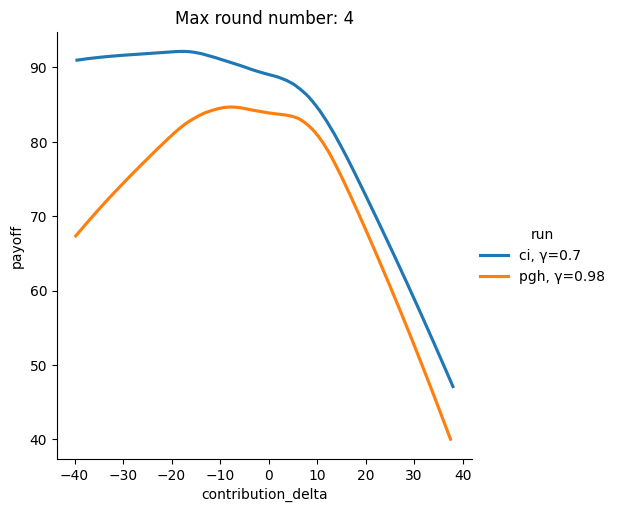

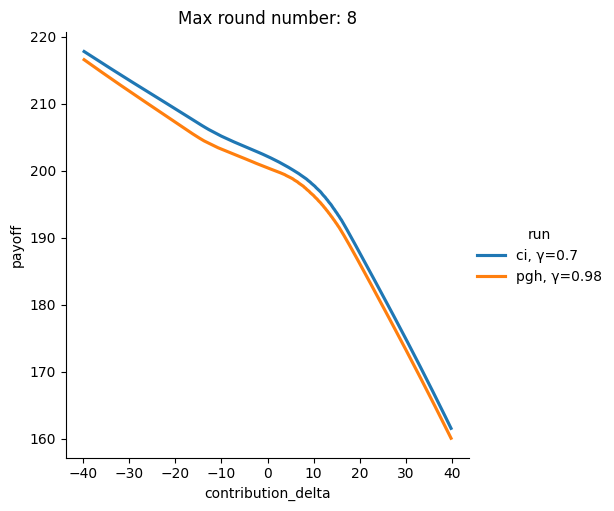

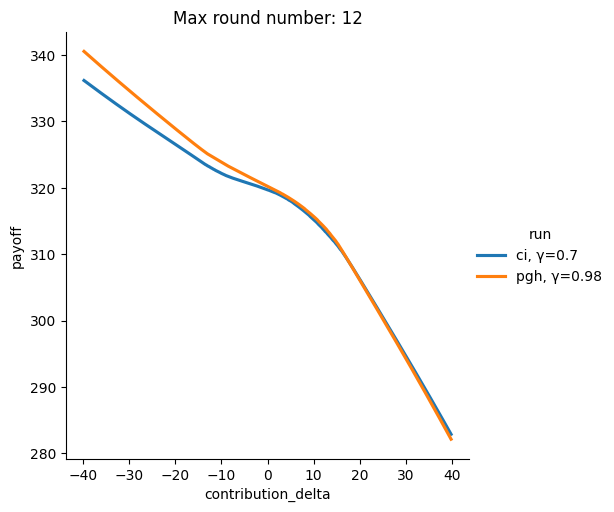

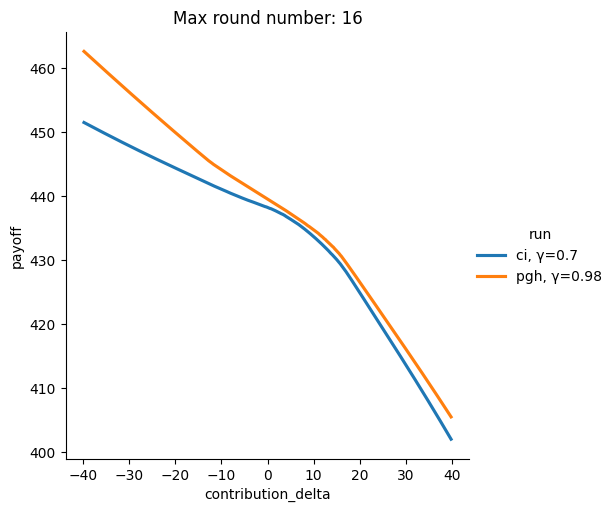

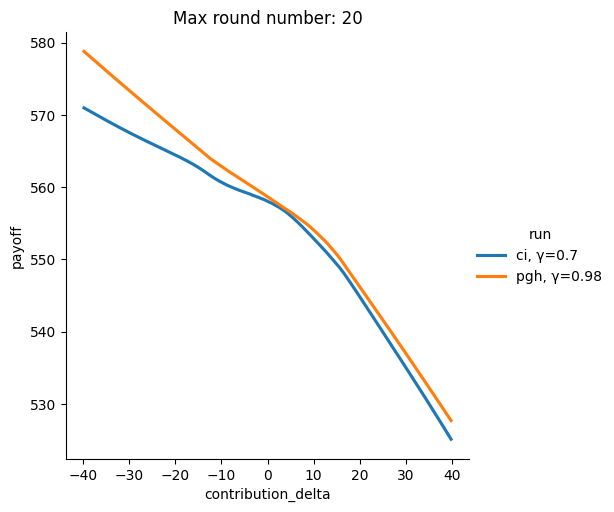

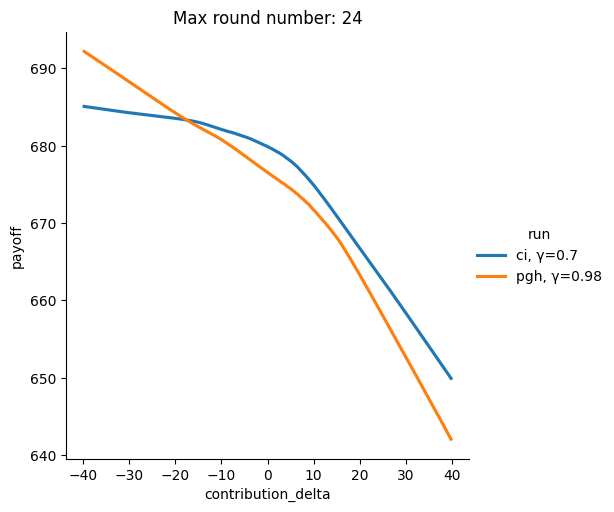

In [ ]:
for i in range(4, 25, 4):
    dfg1 = obtain_dfs(dfm, i)[0]
    tdf = dfg1[dfg1["contribution_delta"] > -40]
    tdf = tdf[tdf["contribution_delta"] < 40]
    g = sns.lmplot(
        data=tdf,
        x="contribution_delta",
        y="payoff",
        hue="run",
        scatter=False,
        lowess=True,
    )
    ax = plt.gca()
    ax.set_title(f"Max round number: {i}")
    g.savefig(os.path.join(fig_path, f"contrib_delta_payoff_40_max_round_{i}.png"))

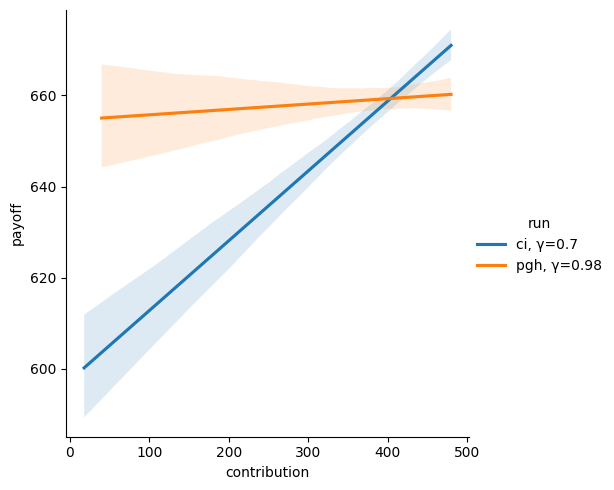

In [ ]:
g = sns.lmplot(
    data=df_big, x="contribution", y="payoff", hue="run", scatter=False, lowess=False
)
g.savefig(os.path.join(fig_path, "contrib_payoff_linreg.png"))

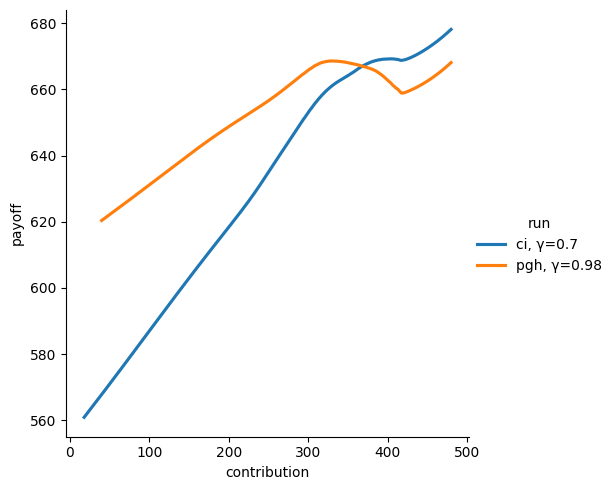

In [ ]:
g = sns.lmplot(
    data=df_big, x="contribution", y="payoff", hue="run", scatter=False, lowess=True
)
g.savefig(os.path.join(fig_path, "contrib_payoff_lowess.jpg"))


# Set y-axis limits to start at 0 for all plots
# g.set(ylim=(0, None))

# g.savefig(os.path.join(fig_path, "contrib_payoff.jpg"))

/tmp/ipykernel_50527/2836126309.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm[dfm["variable"] == "payoff"]


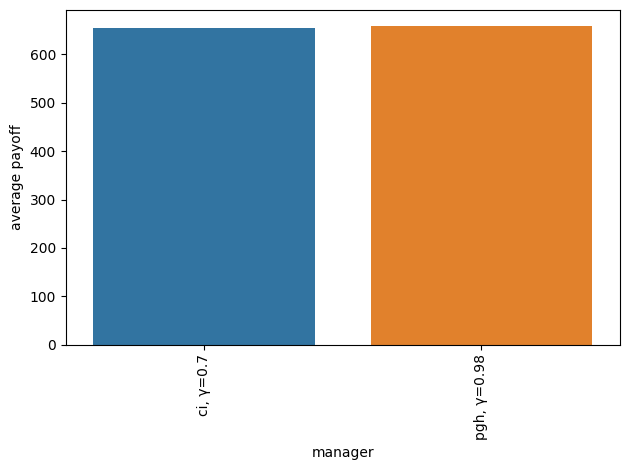

In [ ]:
summed_payoffs = (
    dfm[dfm["variable"] == "payoff"]
    .groupby(["episode", "participant_code", "run"])
    .sum()
)
sp = summed_payoffs.reset_index()

sp = sp[["run", "value"]].groupby("run").mean().reset_index()

sp = sp[~sp["run"].str.contains("pilot")]

g = sns.barplot(data=sp, x="run", y="value")
plt.xticks(rotation=90)
plt.tight_layout()
g.set(ylabel="average payoff", xlabel="manager")
g.figure.savefig(os.path.join(fig_path, "payoff.png"))

In [ ]:
sp.rename(columns={"value": "payoff"}, inplace=False)

,run,payoff
0,"ci, γ=0.7",654.090041
1,"pgh, γ=0.98",659.024308


/tmp/ipykernel_50527/180317418.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm[dfm["variable"] == "common_good"]


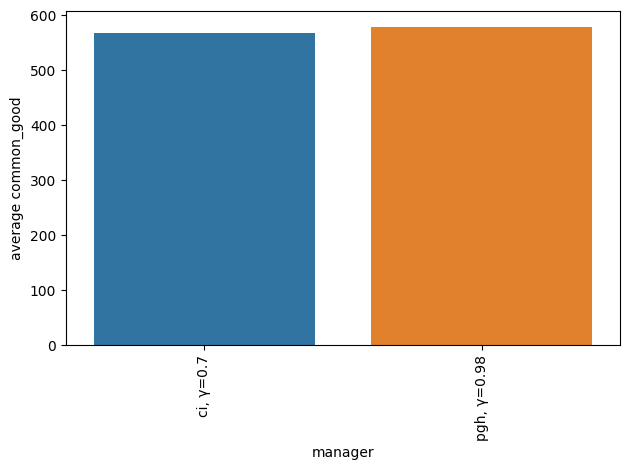

In [ ]:
summed_common_good = (
    dfm[dfm["variable"] == "common_good"]
    .groupby(["episode", "participant_code", "run"])
    .sum()
)
sc = summed_common_good.reset_index()

sc = sc[["run", "value"]].groupby("run").mean().reset_index()

sc = sc[~sc["run"].str.contains("pilot")]

g = sns.barplot(data=sc, x="run", y="value")
plt.xticks(rotation=90)
plt.tight_layout()
g.set(ylabel="average common_good", xlabel="manager")
g.figure.savefig(os.path.join(fig_path, "payoff.png"))

In [ ]:
dfm["run"].unique()

array(['pgh, γ=0.98', 'ci, γ=0.7'], dtype=object)

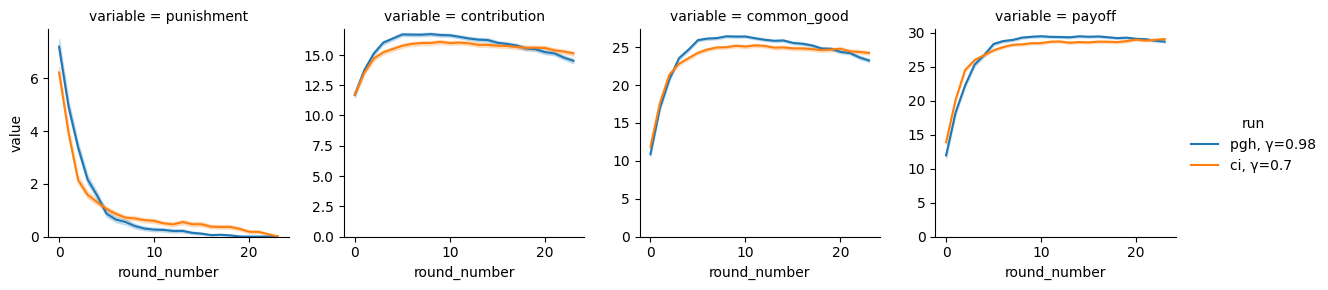

In [ ]:
w = ~dfm["run"].isin(
    [
        "pilot human manager",
        "pilot rule based manager",
    ]
)

dfg = dfm[w].copy()

g = sns.relplot(
    data=dfg,
    x="round_number",
    y="value",
    col="variable",
    hue="run",
    kind="line",
    facet_kws={"sharey": False, "sharex": True},
    height=3,
    aspect=1,
)


# Set y-axis limits to start at 0 for all plots
g.set(ylim=(0, None))

g.savefig(os.path.join(fig_path, "comparison_manager.jpg"))

In [ ]:
dfsum = dfm[["run", "round_number", "variable", "value"]]

In [ ]:
dfsum = dfsum[dfsum["variable"] == "payoff"]

In [ ]:
mean_df = (
    dfsum[["run", "round_number", "value"]]
    .groupby(["run", "round_number"])
    .mean()
    .reset_index()
)

In [ ]:
mean_df[mean_df["round_number"] == 2]

,run,round_number,value
2,"ci, γ=0.7",2,24.5249
26,"pgh, γ=0.98",2,22.2727


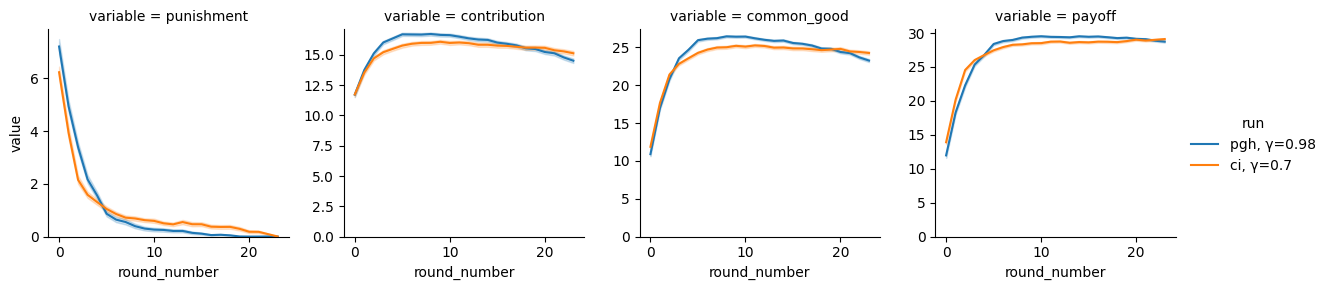

In [ ]:
w = ~dfm["run"].isin(
    [
        "pilot rule based manager",
    ]
)

dfg = dfm[w].copy()

g = sns.relplot(
    data=dfg,
    x="round_number",
    y="value",
    col="variable",
    hue="run",
    kind="line",
    facet_kws={"sharey": False, "sharex": True},
    height=3,
    aspect=1,
)

# Set y-axis limits to start at 0 for all plots
g.set(ylim=(0, None))

g.savefig(os.path.join(fig_path, "comparison_pilot.jpg"))

In [ ]:
dfg

,episode,round_number,participant_code,run,variable,value
0,ah full managed by group_payoff_heavy__0,0,0_0,"pgh, γ=0.98",punishment,15.0
1,ah full managed by group_payoff_heavy__0,1,0_0,"pgh, γ=0.98",punishment,1.0
2,ah full managed by group_payoff_heavy__0,2,0_0,"pgh, γ=0.98",punishment,0.0
3,ah full managed by group_payoff_heavy__0,3,0_0,"pgh, γ=0.98",punishment,0.0
4,ah full managed by group_payoff_heavy__0,4,0_0,"pgh, γ=0.98",punishment,0.0
...,...,...,...,...,...,...
767995,ah full managed by gamma_07__999,19,3_999,"ci, γ=0.7",payoff,20.3
767996,ah full managed by gamma_07__999,20,3_999,"ci, γ=0.7",payoff,28.8
767997,ah full managed by gamma_07__999,21,3_999,"ci, γ=0.7",payoff,23.4
767998,ah full managed by gamma_07__999,22,3_999,"ci, γ=0.7",payoff,23.0


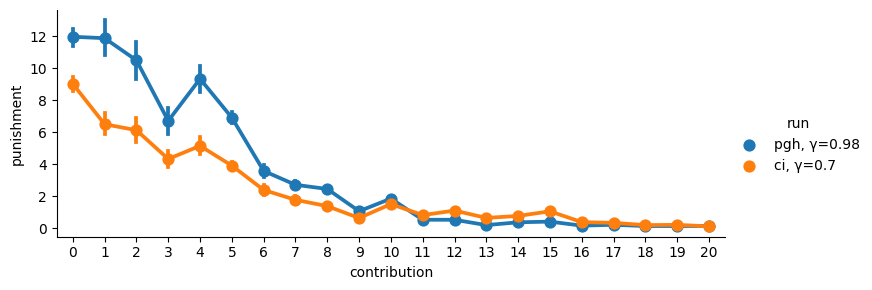

In [ ]:
df["contribution"] = df["contribution"].astype(int)


dfs = df.copy()


g = sns.catplot(
    data=dfs,
    x="contribution",
    y="punishment",
    hue="run",
    kind="point",
    height=3,
    aspect=2.5,
)

g.savefig(os.path.join(fig_path, "comparison_pilot_policy.jpg"))

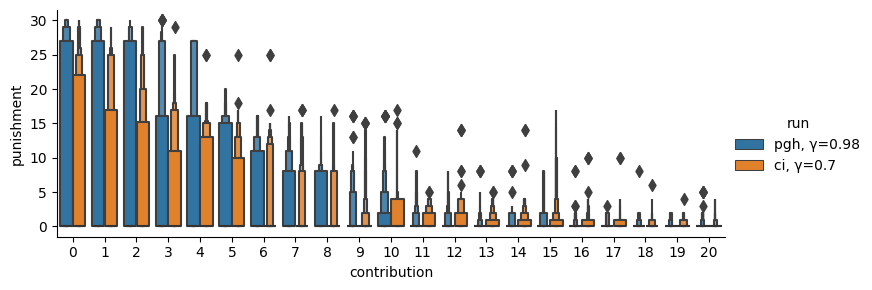

In [ ]:
df["contribution"] = df["contribution"].astype(int)

w = ~df["run"].isin(
    [
        "pilot human manager",
        "pilot rule based manager",
    ]
)

dfs = df[w].copy()

g = sns.catplot(
    data=dfs,
    x="contribution",
    y="punishment",
    hue="run",
    kind="boxen",
    height=3,
    aspect=2.5,
)

g.savefig(os.path.join(fig_path, "comparison_pilot_policy_box.jpg"))

In [ ]:
dfm = df.melt(
    id_vars=["episode", "round_number", "participant_code", "run"],
    value_vars=["punishment", "contribution", "common_good"],
)

# w = ((dfm['round_number'] == 0) & (dfm['variable'] == 'contribution'))

dfs = dfm.groupby(["run", "round_number", "variable"])["value"].mean().reset_index()

dfs = dfs.sort_values(["variable", "round_number", "run"])

dfs.to_csv(os.path.join(fig_path, "aggregates.csv"), index=False)